# k-Nearest Neighbor Algorithm_Code

## scikit-learn 소개 

scikit-learn은 2007년 구글 썸머 코드에서 처음 구현됐으며 현재 파이썬으로 구현된 가장 유명한 머신러닝 오픈 소스 라이브러리이다. 

구성요소는 다음과 같다.
- 샘플 데이터 세트(Samole datasets)
- 데이터 전처리(Preprocessing)기능
- 지도 학습(Supervised learning)모형
- 비지도학습(Unsuperbised learning)모형
- 모형 평가(Model evaluation)

지도 학습(Supervised learning)모형
- Generalized Linear Models
    - Ordinary Least Squares
    - Ridge/Lasso/Elastic Net Regression
    - Logistic regression
    - Polynomial regression
    - Perceptron
- Linear and Quadratic Discriminant Analysis
- Support Vector Machines
- Stochastic Gradient Descent
- Nearest Neighbor Algorithms
- Gaussian Processes
- Naive Bayes
- Decision Trees
- Ensemble methods
    - Random Forests
    - AdaBoost

비지도학습(Unsuperbised learning)모형
- Gaussian mixture models
- Manifold learning
- Clustering
    - K-means
    - DBSCAN
- Biclustering
- Decomposing
    - Principal component analysis (PCA)
    - Factor Analysis
    - Independent component analysis (ICA)
    - Latent Dirichlet Allocation (LDA)
- Covariance estimation
- Novelty and Outlier Detection
- Density Estimation

scikit-learn 서브 패키지
- 자료 제공:
    - sklearn.datasets: 샘플 데이터 세트 제공
- 자료 전처리:
    - sklearn.preprocessing: imputation, encoding 등 단순 전처리
    - sklearn.feature_extraction: Feature Extraction
- 모형:
    - sklearn.base: Base classes and utility functions
    - sklearn.pipeline: Pipeline
    - sklearn.linear_model: Generalized Linear Models
    -sklearn.naive_bayes: Naive Bayes
    -sklearn.discriminant_analysis: Discriminant Analysis
    -sklearn.neighbors: Nearest Neighbors
    -sklearn.mixture: Gaussian Mixture Models
    -sklearn.svm: Support Vector Machines
    -sklearn.tree: Decision Trees
    -sklearn.ensemble: Ensemble Methods
    -sklearn.cluster: Clustering
- 모형 평가:
    - sklearn.metrics: Metrics
    - sklearn.cross_validation: Cross Validation
    - sklearn.grid_search: Grid Search

## Python 소개 

### Python 자료형

In [8]:
print(type(123))
print(type(12.3))
print(type('123'))
print(type(True))

<class 'int'>
<class 'float'>
<class 'str'>
<class 'bool'>


In [30]:
print(type((1,2,3)))           #(1,2,3)
print(type([1, 2, 3]))         #[1,2,3]
print(type({'a':0, 'b':1}))    #{'a':0, 'b':1}
print(type(None))              #None

<class 'tuple'>
<class 'list'>
<class 'dict'>
<class 'NoneType'>


### Numpy

Numpy는 파이썬에서 계산과학분야 연산을 사용할 때 핵심 역할을 하는 라이브러리로 고성능의 __다차원 배열 객체(ndarray)__와 이를 다룰 수 있는 __도구(선형대수연산, 푸리에 변환 등)__를 제공한다. 만약 Matlab이 익숙하다면 아래 페이지를 참고하면 유용하다.
- Matlab 사용자를 위한 nympy 설명 참고문헌: http://scipy.github.io/old-wiki/pages/NumPy_for_Matlab_Users

## kNN Algorithm_code 

### 1. 데이터  

scikit-learn에 있는 유방암(breat cancer) 데이터 셋을 이용했습니다. 이 데이터는 유방암 종양의 임상데이터로 양성종양(benign)과 악성종양(malignant)로 레이블되어있다.

In [6]:
import numpy as np
from sklearn import datasets

cancer = datasets.load_breast_cancer()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

![image](./image/03/03_04.png)

In [8]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [9]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [27]:
X, y = cancer.data, cancer.target
print('Size of data : {}' .format(X.shape)) 
print('Target value : {}' .format(np.unique(y)))

Size of data : (569, 30)
Target value : [0 1]


In [28]:
print("클래스별 샘플 개수:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(y))}))

클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}



-  __'\n'__: 문자열에서 줄을 바꾸기 위한 이스케이프 코드
- np.bincount(X): X의 각 원소들의 개수를 구해줌(X:1-dimension array, nonnegative ints)
- zip([1,2,3],[4,5,6]) -> (1,4),(2,5),(3,6)으로 묶임


In [20]:
np.bincount(np.arange(5))

array([1, 1, 1, 1, 1], dtype=int64)

In [21]:
np.bincount(np.array([0, 1, 1, 3, 2, 1, 7]))

array([1, 3, 1, 1, 0, 0, 0, 1], dtype=int64)

In [13]:
zip([1,2,3],[4,5,6]) 

In [16]:
a=zip([1,2,3],[4,5,6])
for i in a:
    print (i)

(1, 4)
(2, 5)
(3, 6)


###  2. 입력 데이터 준비

데이터로 모델을 학습시키고 잘 작동하는지 확인하기 위해서는 학습데이터에 포함되지 않은(이전에 본 적 없는) 새로운 데이터로 확인(검증)해야한다. 그래서 569개의 데이터를 학습데이터(훈련데이터)와 테스트데이터로 나누어야한다.

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

위의 코드를 실행하면 데이터를 무작위로 섞은 후 75%는 학습데이터로, 나머지 25%는 테스트데이터로 분류된다.

In [116]:
print(' X_train 크기:{} \n X_test 크기:{}'.format(X_train.shape,X_test.shape))

 X_train 크기:(426, 30) 
 X_test 크기:(143, 30)


### 3. 알고리즘 학습(훈련)

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [121]:
knn.predict(X_train)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1,

## 정확도

In [122]:
print('학습데이터 정확도:{:.4f}'.format(knn.score(X_train,y_train)))

학습데이터 정확도:0.9531


In [123]:
knn.predict(X_train)==y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,

In [124]:
np.bincount(knn.predict(X_train)==y_train)

array([ 20, 406], dtype=int64)

In [125]:
np.bincount(knn.predict(X_train)==y_train)[1]/y_train.shape

array([ 0.95305164])

### 4, 알고리즘 테스트(검증) 

테스트 데이터를 이용해 알고리즘의 accuracy를 구해본다.

In [126]:
print('테스트데이터 정확도:{:.4f}'.format(knn.score(X_test,y_test)))

테스트데이터 정확도:0.9091


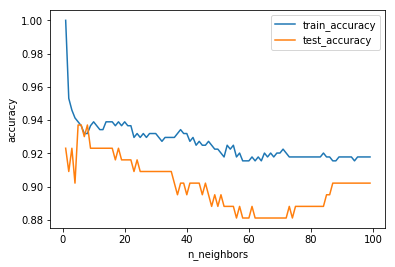

In [128]:
import matplotlib.pyplot as plt
training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 100)

for n_neighbors in neighbors_settings:
    # 모델 생성
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # 학습데이터 정확도 저장
    training_accuracy.append(knn.score(X_train, y_train))
    # 테스트정확도 저장
    test_accuracy.append(knn.score(X_test, y_test))

#그래프 그리기
plt.figure()
plt.plot(neighbors_settings, training_accuracy, label='train_accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test_accuracy')
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

- 한글 깨짐 현상이 보이는 경우 다음 사이트를 통해 해결하자 
http://corazzon.github.io/matplotlib_font_setting

학습 accuracy를 보면 k가 작아질수록 학습이 과대적합(overfitting)되었다: k가 적을 수록 모델이 복잡해지고 k=1일 때는 완벽한 예측을 한다. 
- 과대적합(overfitting):In statistics, overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably"
<br>즉, 과대적합이란 모델이 학습데이터에 너무 맞게 학습되어 새로운데이터 즉, 테스트데이터에 맞지 않은(일반화되지 않는) 현상을 말한다.
    - 일반화(Generalization)란, 모델이 새로운 데이터에 대해 정확히 예측할 수 있으면 이를 일반화 되었다고 한다.

## Reference

Jupyter noteook: http://cyan91.tistory.com/7
<br>교재 코드: https://github.com/rickiepark/introduction_to_ml_with_python
1. https://datascienceschool.net/view-notebook/293ece8b0d124fbaa4d4d52bb8f1cb42/
2. https://github.com/brenden17/blog/blob/master/post/ms.scikit-learn.v.md
3. O'Reilly Media.(2017). Introduction to Machine Learning with Python(박해선 역). 서울:한빛미디어(주). 